In [39]:
import json
import numpy as np
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
import cv2

In [2]:
path = Path('/mmdetection/data/carpart')

In [3]:
train = json.load(open(path/'annotations'/'train.json'))
print(len(train['images']),len(train['annotations']))

4900 63950


In [16]:
CATEGORIES = [c['name'] for c in train['categories']]

In [17]:
print(CATEGORIES)

['__background', 'sli_side_turn_light', 'tyre', 'alloy_wheel', 'hli_head_light', 'hood', 'fwi_windshield', 'flp_front_license_plate', 'door', 'mirror', 'handle', 'qpa_quarter_panel', 'fender', 'grille', 'fbu_front_bumper', 'rocker_panel', 'rbu_rear_bumper', 'pillar', 'roof', 'blp_back_license_plate', 'window', 'rwi_rear_windshield', 'tail_gate', 'tli_tail_light', 'fbe_fog_light_bezel', 'fli_fog_light', 'fuel_tank_door', 'lli_low_bumper_tail_light']


In [21]:
highlight = ['rbu_rear_bumper', 'tail_gate', 'tli_tail_light', 'qpa_quarter_panel' , 'rwi_rear_windshield','blp_back_license_plate']
code = [CATEGORIES.index(h) for h in highlight]
code = set(code)
print(code)


{11, 16, 19, 21, 22, 23}


In [43]:
rear_images = []
for img in tqdm(train['images']):
    cates = [a['category_id'] for a in train['annotations'] if a['image_id']==img['id']]
    overlap = code.intersection(cates)
    if len(overlap) / len(code) >= 0.5 and len(cates) <= 5:
        rear_images.append(img['id'])


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4900/4900 [02:13<00:00, 36.74it/s]


In [45]:
print('rear : ',len(rear_images))
print('ratio : ',len(rear_images)/len(train['images']))

rear :  174
ratio :  0.035510204081632656


In [46]:
import copy
rear_data = copy.deepcopy(train)
rear_data['images'] = [i for i in train['images'] if i['id'] in rear_images]
rear_data['annotations'] = [a for a in train['annotations'] if a['image_id'] in rear_images]
print(len(rear_data['images']),len(rear_data['annotations']))

174 735


In [47]:
with open(path/'annotations'/'close_rear_carpart.json', 'w', encoding='utf-8') as f:
    json.dump(rear_data, f, ensure_ascii=False, indent=4)

In [35]:
def sample(js_data):
    #i = random.choice(js_data['images'])
    num = 3
    imgs = random.sample(js_data['images'],num**2)
    #print(i['id'],i['url'])
    #num = 2 
    fig, axis = plt.subplots(num, num,figsize=(15,15))
    
    for idx,i in enumerate(imgs):
        annos = [np.array(a['segmentation']).reshape(-1,2).astype(np.int32) 
                 for a in js_data['annotations'] if a['image_id'] == i['id']]
        image = cv2.imread(str(path/'images'/i['file_name']))
        image = cv2.drawContours(image,annos,-1,(255,0,0),2)
        
        axis[int(idx/num),idx%num].imshow(image)
        axis[int(idx/num),idx%num].set_title(i['id'])

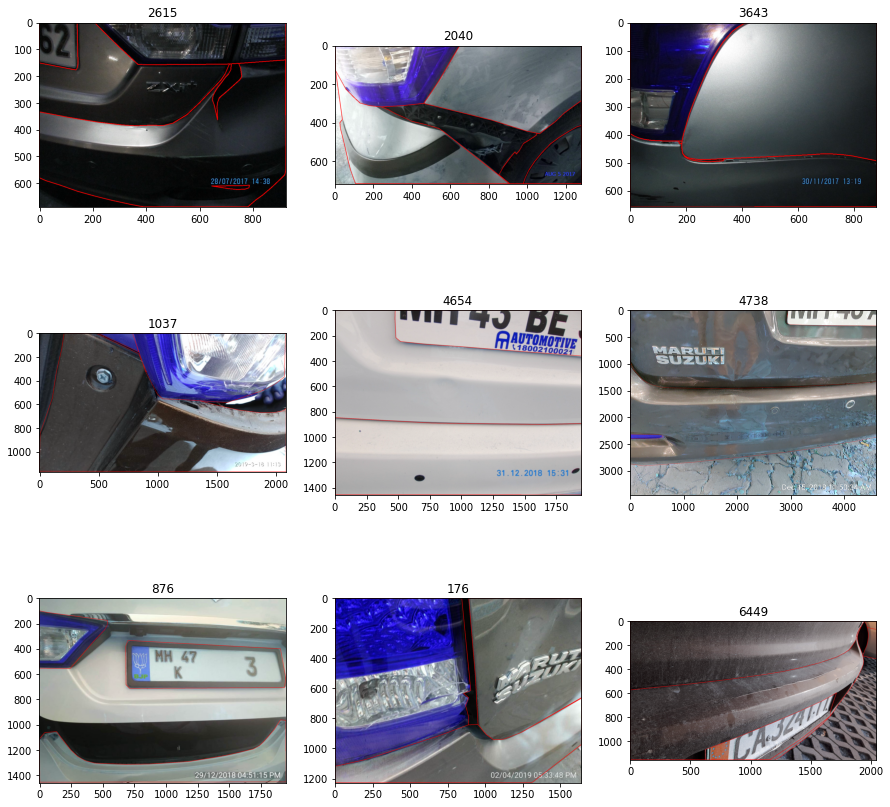

In [49]:
sample(rear_data)